In [1]:
# load some necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, FloatSlider
from plot_def import *

# Komplexe Wechselstromrechnung an einem Beispiel

Als einfaches Beispiel wird im Folgenden das hier gezeigte Netzwerk betrachtet. Die Spannungsquelle regt das Netzwerk mit einer Cosiunusförmigen Spannung an, welche eine Spitzenspannung von 1.5V und einen Nullphasenwinkel (Phasenwinkel zum Zeitpunkt t=0) von 30° hat. Die Betriebsfrequenz liegt bei f=0.2Hz und die Werte der Bauteile sind mit R=0.5Ω, C=1F und L=0.5H gegeben.

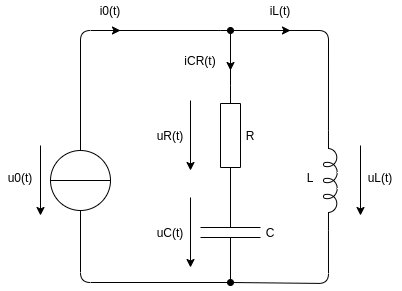

In [2]:
R  = 0.5
C  = 1
L  = 0.5
f  = 0.2
ω  = 2*np.pi*f
u0 = 1.5
φ0 = 30

## Berechnung des Netzwerks im Zeitbereich

Abgeleitet aus den gegebenen Werten folgt als mathematische Beschreibung der Versorgungsspannung

$$ u_0(t) = 1.5\text{V} \cdot \cos{\left( \omega t + \varphi_0\right)} $$

wobei $\omega=2\pi f$ die Kreisfrequenz und $\varphi_0 = 30^\circ$ der Nullphasenwinkel ist.
Da die Spule direkt parallel mit der Spannungsquelle verschaltet ist, ist auch die Spannung an der Spule mit

$$ u_\text{L}(t) = u_0(t) = 1.5\text{V} \cdot \cos{\left( \omega t + \varphi_0 \right)} $$

gegeben.
Die Gesätzmäßigkeit zwischen Strom und Spannung an einer Sule lautet

$$ u(t) = L\cdot\frac{\mathrm{d} i(t)}{\mathrm{d}t} $$

worüber sich für den Strom

$$ i(t) = \frac{1}{L}\cdot\int u(t) \,\mathrm{d}t = \frac{1}{L}\cdot\frac{1.5\text{V}}{\omega} \sin{\left( \omega t + \varphi_0\right)} = 2.387\text{A}\sin{\left( \omega t + \varphi_0\right)}$$

angeben lässt.
Die Integrationskonstante ist hierbei Null, da es keinen Gleichanteil des Stromes geben kann.
Der Strom ist durch die Integration nun Sinusförmig, was einer Cosinusfunktion mit 90° ($\pi/2$) Phasenverschiebung entspricht:

$$ i(t) = 2.387\text{A}\sin{\left( \omega t + \varphi_0\right)} = 2.387\text{A}\cos{\left( \omega t + \varphi_0 - \pi/2 \right)}$$

Die Summe der Phasenverschiebungen lässt sich nun als Phasenwinkel $\varphi_\text{iL}=30°-90°=-60°$ zusammenfassen.

Die Berechnung über diese Integration war vergleichsweise leicht.
Im Fall der Serienschaltung ist die Maschengleichung

$$ u_0(t) = u_\text{R}(t) + u_\text{C}(t)$$

zu erfüllen.
Mit den Zusammenhägen von Strom und Spannung an Widerstand und Kondensator folgt

$$ u_0(t) = R\cdot i_\text{CR}(t) + \frac{1}{C}\cdot\int i_\text{CR}(t) \,\mathrm{d}t$$

Um nun den Strom $i_\text{CR}(t)$ anhand dieser Gleichung zu bestimmen, müsste nach diesem die Gleichung aufgelöst werden, was nicht trivial möglich ist.
Ein Ansatz wäre für den Strom eine ebenfalls harmonische Zeitabhängigkeit in Form einer Cosinusförmigen Funktion anzunehmen um dann mit diversen Additionstheoremen die Gleichung umzustellen.
Dies ist aber nicht notwendig, wenn man sich der komplexen Wechselstromrechnung bedient.

## Berechnung des Netzwerks im Bildbereich (Frequenzbereich)

Bei der komplexen Wechselstromrechnung bedient man sich der komplexen Zahlen, wodurch sich die Berechnungen deutlich kompfortabler durchführen lassen.

### Ein Ausflug in die komplexe Zahlenwelt

Grundlegend bestehen die komplexen Zahlen aus einem Real- und Imaginärteil, die über die komplexe Einheit $\mathrm{j}=\sqrt{-1}$ miteinander verknüpft sind.
Eine komplexe Zahl lässt sich auch über einen Betrag und einen Winkel zur reellen Achse angeben:

$$ \underline{z} = a + \mathrm{j}b = |\underline{z}|\cdot\mathrm{e}^{\mathrm{j}\arg{\left\lbrace\underline{z}\right\rbrace}} = \sqrt{a^2+b^2}\cdot\mathrm{e}^{\mathrm{j}\,\mathrm{atan}\left(\frac{b}{a}\right)}$$

wobei $|...|$ den Betrag ermittelt und $\arg{\{...\}}$ den Winkel, was sich widerum mit hilfe der Trigonometrie in die Wurzel- und Arcustangesfunktion überführen lässt.
Eine komplexe Zahl angegeben mit Betrag $z$ und Winkel $\alpha$ lässt sich wiederum mit

$$ \underline{z} = z\,\mathrm{e}^{\mathrm{j}\alpha} = z \cos{\alpha} + \mathrm{j} z \sin{\alpha} \quad\text{(1)}$$

in die Schreibweise nach Real- und Imaginärteil überführen.

Multipliziert man eine beliebige komplexe Zahl mit einer Komplexenzahl des Betrages 1, bewegt sich das Ergebnis auf einem Kreis.
Eine solche komplexe Zahl mit dem Betrag von 1 und dem Winkel $\phi$ ist gegeben mit

$$ \underline{z}_1 = \mathrm{e}^{\mathrm{j}\phi} $$

Mit dem folgenden interaktiven Bild kann das Produkt

$$ \left( a + \mathrm{j}b \right) \cdot \mathrm{e}^{\mathrm{j}\phi} $$

ausprobieren.

In [3]:
interactive(plot_cplxTimesRot, a=FloatSlider(min=-1.8, max=1.8, step=0.1, value=1), b=FloatSlider(min=-1.8, max=1.8, step=0.1, value=1), phi=(-90, 450, 10))

interactive(children=(FloatSlider(value=1.0, description='a', max=1.8, min=-1.8), FloatSlider(value=1.0, descr…

Komplexe Zahlen sind daher nicht nur Zahlen, die zwei Komponenten haben, sondern mit denen sich Drehungen in der Zahlenebene hervorragend beschreiben lassen.

Ein weiteres Beispiel für den rotations Zusammenhang ist eine zweifache Multiplikation mit $\mathrm{j}$.
Nimmt man eine reelle und positive Zahl $\underline{z}_1=a_1$ als Ausganswert, folgt

$$ \underline{z}_2 = \underline{z}_1 \cdot \mathrm{j} \cdot \mathrm{j} = a_1 \cdot \sqrt{-1} \cdot \sqrt{-1} = a_1 \cdot \sqrt{-1}^2 = a_1 \cdot (-1) = -a_1 = -\underline{z}_1 $$

was bedeutet, dass die Zahl $\underline{z}_1$ um zweimal 90° bzw. um einmal 180° gedreht wurde.

### Komplexe Zahlen für harmonische Schwingunen

Mit der Eigenschaft von komplexen Zahlen besonders Rotationen einfach angeben zu können, lassen sich die Ableitungen und Integrationen von Cosiunus- und Sinusschwingungen sehr einfach darstellen.
Nehmen wir als Beispiel die Versorgungsspannung

$$ u_0(t) = 1.5\text{V} \cdot \cos{\left( \omega t + \varphi_0\right)} $$

zur Hand, so können wir diese auch angeben als (vgl. Gleichung (1))

$$ u_0(t) = \Re{\left\lbrace 1.5\text{V} \cdot \mathrm{e}^{\mathrm{j}(\omega t + \varphi_0)} \right\rbrace} = \Re{\left\lbrace 1.5\text{V} \cdot \mathrm{e}^{\mathrm{j}\varphi_0} \cdot \mathrm{e}^{\mathrm{j}\omega t} \right\rbrace} $$

Eine Ableitung nach der Zeit t bewirkt

$$ \frac{\mathrm{d}u_0(t)}{\mathrm{d}t} = \frac{\mathrm{d}}{\mathrm{d}t}\Re{\left\lbrace 1.5\text{V} \cdot \mathrm{e}^{\mathrm{j}\varphi_0} \cdot \mathrm{e}^{\mathrm{j}\omega t} \right\rbrace} = \Re{\left\lbrace 1.5\text{V} \cdot \mathrm{e}^{\mathrm{j}\varphi_0} \cdot \frac{\mathrm{d}}{\mathrm{d}t}\mathrm{e}^{\mathrm{j}\omega t} \right\rbrace} = \Re{\left\lbrace 1.5\text{V} \cdot \mathrm{e}^{\mathrm{j}\varphi_0} \cdot \mathrm{j}\omega\,\mathrm{e}^{\mathrm{j}\omega t} \right\rbrace} $$

und ist damit eine Multiplikation mit dem Faktor $\mathrm{j}\omega$.
Abgesehen von $\omega$ bewirkt die Multiplikation mit $\mathrm{j}$ eine Drehung in der komplexen Zahlenebene.
Im Grunde beschreibt dieses Prinzip, dass bei einer Ableitung eine Sinus- eine Cosinusschwingung ergibt, was lediglich eine Phasenverschiebung von 90° und Multiplikation mit der inneren Ableitung bedeutet.
Ebenso einfach lässt sich die Integration darstellen, die dann eine Multiplikation mit $1/(\mathrm{j}\omega)$ ist.
Zusammenfassend:

$$ \frac{\mathrm{d}[\dots]}{\mathrm{d}t} \rightarrow \mathrm{j}\omega \cdot [\dots]\\ \int [\dots] \mathrm{d}t \rightarrow \frac{1}{\mathrm{j}\omega} \cdot [\dots] $$

Es sei nochmal anzumerken, dass dieser Zusammenhang bei harmonischen, also Sinus- und Cosinusförmigen, Schwingungen gilt.

### Die komplexe Wechselstromrechnung

Da Ableitungen und Integrationen durch Phasenverschiebungen angegeben werden können, sind in einem elektrischen Netzwerk wie es oben gegeben ist nur noch die Beträge und Nullphasenwinkel der Ströme und Spannungen wichtig.
Die Zeitfunktion ist je eine phasenverschobene Cosinusfunktion mit der globalen Kreisfrequenz $\omega$.
Die Kombination aus Betrag und Nullphasenwinkel wird komplexer Scheitelwertzeiger genannt.
Im Fall der Versorgungsspannung ergibt sich

$$ u_0(t) = \Re{\left\lbrace \underline{\hat{u}}_0 \cdot \mathrm{e}^{\mathrm{j}\omega t} \right\rbrace} $$

mit $ \underline{\hat{u}}_0 = 1.5\text{V} \cdot \mathrm{e}^{\mathrm{j}\varphi_0} $ als dem komplexen Scheitelwertzeiger der Versorgungsspannung.

Für die Bauteile in der gegebenen Schaltung lassen sich Impedanzen angeben, welche das Verhältnis zwischen Spannung und Strom komplexwertig angeben:

$$ \underline{Z}_\text{R} = R \text{,}\quad \underline{Z}_\text{L} = \mathrm{j}\omega L \text{,}\quad \underline{Z}_\text{C} = \frac{1}{\mathrm{j}\omega C} $$

Vergleichend beginnend mit dem Strom durch die Spule ergibt sich

$$ \underline{\hat{i}}_\text{L} = \frac{\underline{\hat{u}}_0}{\underline{Z}} = \frac{1.5\text{V} \cdot \mathrm{e}^{\mathrm{j}\varphi_0}}{\mathrm{j}\omega L} = -\mathrm{j}\frac{1.5\text{V} \cdot \mathrm{e}^{\mathrm{j}\varphi_0}}{\omega L} = \frac{1.5\text{V} \cdot \mathrm{e}^{\mathrm{j}(\varphi_0 - 90°)}}{\omega L} = 2.387\text{A}\,\mathrm{e}^{-\mathrm{j}60°}$$

Die Zeitfunktion lässt sich dann durch die in Gleichung (2) angegebene Rechnung ermitteln:

$$ i_\text{L}(t) = \Re{\left\lbrace \underline{\hat{i}}_\text{L} \cdot \mathrm{e}^{\mathrm{j}\omega t} \right\rbrace} $$

Im folgenden interaktiven Bild, kann man sich den Strom und die Spannung in der komplexen Zahlenebene und im Zeitbereich anziegen und die Zeit t variieren.
Die Zeiger (oder Werte) in der komplexen Ebene sind das Produkt des komplexen Scheitelwertzeigers und $\mathrm{e}^{\mathrm{j}\omega t}$, also eben dem Argument der Realteilbildung in Gleichung (2).
Der komplexe Scheitelwertzeiger ist zum Zeitpunkt t=0 zu sehen.

In [8]:
# Komplexe Scheitelwertzeiger
u_0 = u0 * np.exp( 1j*np.deg2rad(φ0) )
i_L = u0/(ω*L) * np.exp( 1j*np.deg2rad(φ0 - 90) )

# Definition der Zeitfunktionen im Komplexen
def u_0_t(t):
    return u_0 * np.exp(1j*ω*t)

def i_L_t(t):
    return i_L * np.exp(1j*ω*t)

# Starten der Interaktiven Darstellung
interactive(plot_u0iL, funu=fixed(u_0_t), funi=fixed(i_L_t), t=FloatSlider(min=0, max=10, step=0.1, value=5))

interactive(children=(FloatSlider(value=5.0, description='t', max=10.0), Output()), _dom_classes=('widget-inte…

Betrachtet man nun die Serienschaltung von Widerstand R und Kondensator C, so lässt sich in diesem Fall zunächst eine gesamt Impedanz angeben als

$$ \underline{Z}_\text{RC} = \underline{Z}_\text{R} + \underline{Z}_\text{C} = R + \frac{1}{\mathrm{j}\omega C} = R - \mathrm{j}\frac{1}{\omega C} $$

Der Strom durch diesen Zweig ergibt sich damit zu

$$ \underline{\hat{i}}_\text{RC} = \frac{\underline{\hat{u}}_0}{\underline{Z}_\text{RC}} = \frac{1.5\text{V} \cdot \mathrm{e}^{\mathrm{j}\varphi_0}}{R - \mathrm{j}\frac{1}{\omega C}} $$

In [5]:
i_RC = u_0 / ( R - 1j/(ω*C) )
print("i_RC = {:.3f}A + j {:.3f}A".format(np.real(i_RC), np.imag(i_RC)))
print("i_RC = {:.3f}A * exp(j {:.3f}°)".format(np.abs(i_RC), np.rad2deg(np.angle(i_RC))))

i_RC = 0.060A + j 1.595A
i_RC = 1.596A * exp(j 87.858°)


Damit ergeben sich für die Spannungen an Widerstand und Kondensator

$$ \underline{\hat{u}}_\text{R} = \underline{Z}_\text{R}\cdot\underline{\hat{i}}_\text{RC} = R \cdot \underline{\hat{i}}_\text{RC} \\
\underline{\hat{u}}_\text{C} = \underline{Z}_\text{R}\cdot\underline{\hat{i}}_\text{RC} = -\mathrm{j}\frac{1}{\omega C}\cdot\underline{\hat{i}}_\text{RC} $$

In [6]:
u_R = R * i_RC
u_C = -1j/(ω*C) * i_RC
print("u_R = {:.3f}A + j {:.3f}A".format(np.real(u_R), np.imag(u_R)))
print("u_R = {:.3f}A * exp(j {:.3f}°)".format(np.abs(u_R), np.rad2deg(np.angle(u_R))))
print("")
print("u_C = {:.3f}A + j {:.3f}A".format(np.real(u_C), np.imag(u_C)))
print("u_C = {:.3f}A * exp(j {:.3f}°)".format(np.abs(u_C), np.rad2deg(np.angle(u_C))))

u_R = 0.030A + j 0.797A
u_R = 0.798A * exp(j 87.858°)

u_C = 1.269A + j -0.047A
u_C = 1.270A * exp(j -2.142°)


In [9]:
plot_u0iRCuCuR


# Definition der Zeitfunktionen im Komplexen
def i_RC_t(t):
    return i_L * np.exp(1j*ω*t)

def u_R_t(t):
    return u_R * np.exp(1j*ω*t)

def u_C_t(t):
    return u_C * np.exp(1j*ω*t)

# Starten der Interaktiven Darstellung
interactive(plot_u0iRCuCuR, funu0=fixed(u_0_t), funiRC=fixed(i_L_t), funuR=fixed(u_R_t), funuC=fixed(u_C_t), t=FloatSlider(min=0, max=10, step=0.1, value=5))

interactive(children=(FloatSlider(value=5.0, description='t', max=10.0), Output()), _dom_classes=('widget-inte…

Mit diesem Ergebnis ist das Netzwerk vollständig beschrieben.

## Zusammenfassend

Mit hilfe der komplexen Zahlen lassen sich die Ableitungen und Integration, welche bei den Bauteilen Spule und Kondensator erforderlich werden, sehr einfach durch Multiplikationen mit der komplexen Einheit j darstellen, da bei harmonischen Zeitfunktionen diese sich lediglich durch eine Phasenverschiebung nach einer Integration oder Ableitung unterscheiden.
Es ist daher völlig ausreichend die Beträge und Phasen der Ströme und Spannungen zu wissen bzw. zu berechnen.